# Predicting Boston Housing Prices
## Machine Learning (Supervised): Regression

### Description

This project will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

### Project Goals
- **Target: What is the price for a house in Boston?**
- How to investigate the latent features of a dataset.
- How to analyze various learning performance plots for variance and bias.
- How to determine the best-guess model for predictions from unseen data.
- How to evaluate a model's performance on unseen data using previous data.

### Reference
ref: [Housing Values in Suburbs of Boston](https://www.kaggle.com/c/boston-housing)

### Data Source

ref: [Boston Housing Dataset](https://archive.ics.uci.edu/ml/datasets/Housing)

## Load Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

from time import time
from IPython.display import display 
from tensorflow.python.client import device_lib

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, ShuffleSplit, train_test_split
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.metrics import fbeta_score, accuracy_score, precision_score, recall_score
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from sklearn.linear_model import LogisticRegression 
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.naive_bayes import GaussianNB
#from sklearn.base import clone
#from sklearn.svm import SVC
#from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor

import seaborn as sns
sns.set(style="dark")
sns.set(font_scale=1.5)

%matplotlib inline

#import visuals as vs
%run ./visuals.py

print('Python:',sys.version)
print ('GPU:',device_lib.list_local_devices()[1].physical_device_desc,device_lib.list_local_devices()[1].name)

Python: 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
GPU: device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1 /device:GPU:0


## Data Summary

In [2]:
df = pd.read_csv('housing.csv')
y = df['MEDV']
X = df.drop('MEDV', axis = 1)

print('Dataframe Shape:',df.shape)
display(df.head())
display(df.describe())
display(df.dtypes)

Dataframe Shape: (489, 4)


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

- **MEDV**: median value of owner-occupied homes
- **RM**: average number of rooms per dwelling
- **LSTAT**: percentage of population considered lower status
- **PTRATIO**: pupil-teacher ratio by town

In [3]:
print ('Statistics for Boston Housing Dataset\n')
print ('Minimum price: ${:,.2f}'.format(np.min(y)))
print ('Maximum price: ${:,.2f}'.format(np.max(y)))
print ('Mean price: ${:,.2f}'.format(np.mean(y)))
print ('Median price ${:,.2f}'.format(np.median(y)))
print ('Standard deviation of prices: ${:,.2f}'.format(np.std(y)))

Statistics for Boston Housing Dataset

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


## Exploratory Visualization
### Scatter Matrix

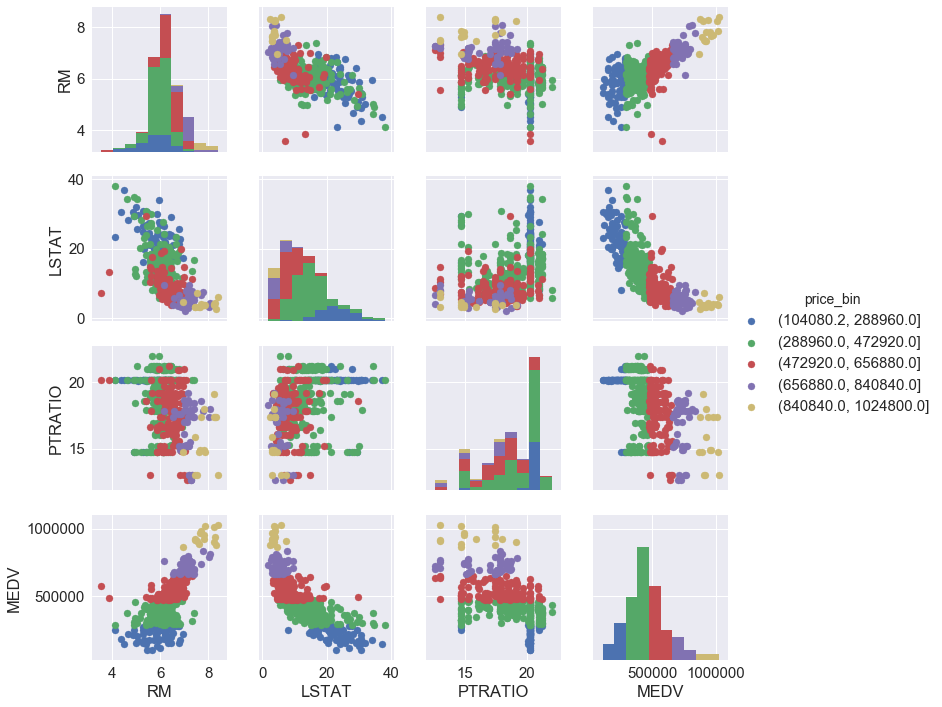

In [4]:
df2 = df.copy(deep=True)
df2['price_bin'] = pd.cut(df2['MEDV'],5,retbins=True)[0]

g = sns.PairGrid(df2, hue="price_bin")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

### Kernel Density Estimation Plots

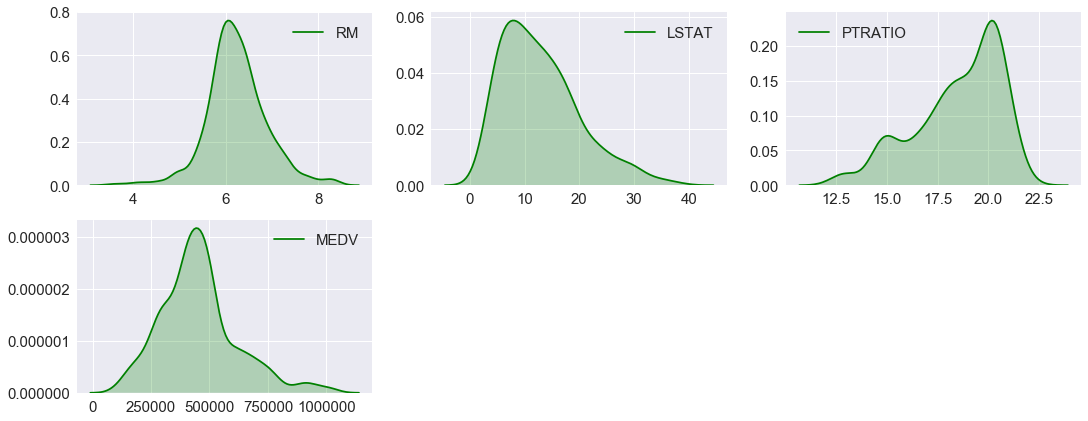

In [5]:
num_columns = df.select_dtypes(exclude=['object']).columns
fig = plt.figure(figsize=(18,7))
for i, col in enumerate(num_columns):
    fig.add_subplot(2, 3, i+1)
    sns.kdeplot(df[col], shade=True, color='g')
plt.show()

## Developing a Model

In [6]:
def performance_metric(y_true, y_pred):
    score = r2_score(y_true, y_pred)
    return score

## Training and Testing Datasets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print ('Dataframe Shape (Training):',X_train.shape, y_train.shape)
print ('Dataframe Shape (Testing):',X_test.shape, y_test.shape)

Dataframe Shape (Training): (391, 3) (391,)
Dataframe Shape (Testing): (98, 3) (98,)


## Analyzing Model Performance

### Learning Curves

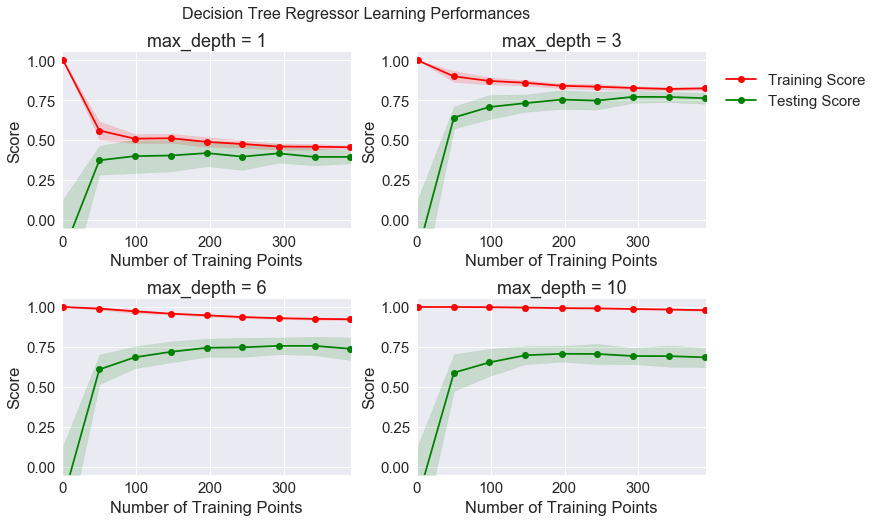

In [8]:
ModelLearning(X, y)

### Complexity Curves

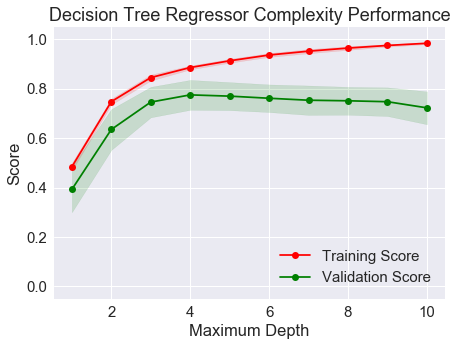

In [9]:
ModelComplexity(X_train, y_train)

## Evaluating Model Performance

In [10]:
def fit_model(X, y):
    
    reg = DecisionTreeRegressor()
    param_grid = {'max_depth': np.arange(1,11)}
    scoring = make_scorer(performance_metric)
    cv = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    
    grid = GridSearchCV(reg, param_grid=param_grid, scoring=scoring, cv=cv)
    grid = grid.fit(X, y)

    return grid.best_estimator_

### Optimal Model

In [11]:
reg = fit_model(X_train, y_train)

print ('Parameter `max_depth` is {} for the optimal model'.format(reg.get_params()['max_depth']))

Parameter `max_depth` is 4 for the optimal model


### Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

In [12]:
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

for i, price in enumerate(reg.predict(client_data)):
    print ('Predicted selling price for Client {}`s home: ${:,.2f}'.format(i+1, price))

Predicted selling price for Client 1`s home: $391,183.33
Predicted selling price for Client 2`s home: $189,123.53
Predicted selling price for Client 3`s home: $942,666.67


### Sensitivity

In [13]:
def SensitivityAnalysis(X, y, fit_model, client_data):
    prices = []

    for k in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = k)

        reg = fit_model(X_train, y_train)
        pred = reg.predict([client_data])[0]
        prices.append(pred)

        print ("Trial {}: ${:,.2f}".format(k+1, pred))
    print ("\nRange in prices: ${:,.2f}".format(max(prices) - min(prices)))
    print ("Standard Deviation in prices: ${:,.2f}".format(np.std(prices)))
    
SensitivityAnalysis(X, y, fit_model, client_data[0])

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39
Standard Deviation in prices: $20,073.91
